In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

import matplotlib.pyplot as plt
# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置支持中文的字体，优先使用SimHei
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
sns.set_theme(style="white", font_scale=1.2)

df = pd.read_excel('filtered-ref.xlsx')
df_low = df[df['孕妇BMI'] < 27].copy()
df_mid = df[(df['孕妇BMI'] >= 27) & (df['孕妇BMI'] <= 38)].copy()
df_high = df[df['孕妇BMI'] > 38].copy()

# 打印结果以验证
print("BMI < 27 的 DataFrame:")
print(df_low.head())
#print("\nBMI 在 27 到 38 之间的 DataFrame:")
#print(df_mid.head())
#print("\nBMI > 38 的 DataFrame:")
#print(df_high.head())

BMI < 27 的 DataFrame:
      序号  孕妇代码  年龄     身高    体重                 末次月经 IVF妊娠      检测日期  检测抽血次数  \
452  515  A125  26  161.0  69.0  2023-08-08 00:00:00  自然受孕  20231110       1   
453  516  A125  26  161.0  69.0  2023-08-08 00:00:00  自然受孕  20231208       2   
576  654  A160  31  160.0  53.0  2023-09-13 00:00:00  自然受孕  20230602       1   
577  655  A160  31  160.0  53.0  2023-02-19 00:00:00  自然受孕  20230622       2   
578  656  A160  31  160.0  53.0  2023-02-19 00:00:00  自然受孕  20230714       3   

      检测孕周  ...    Y染色体浓度    X染色体浓度  13号染色体的GC含量  18号染色体的GC含量  21号染色体的GC含量  \
452  12w+3  ...  0.040241  0.037633     0.381195     0.393914     0.405052   
453  16w+3  ...  0.047848  0.040966     0.380911     0.393563     0.404006   
576  13w+1  ...  0.033255  0.032390     0.374660     0.387423     0.396035   
577  16w+2  ...  0.040125  0.048562     0.375990     0.388652     0.397384   
578  19w+2  ...  0.029873  0.028787     0.377434     0.389501     0.399277   

     被过滤掉读段数的比例  染色体的非整倍体  怀

In [2]:
%load_ext autoreload
%autoreload 2

样本数: 886
            孕妇BMI      Y染色体浓度
count  886.000000  886.000000
mean    31.973327    0.077709
std      2.340311    0.033790
min     27.005131    0.010004
25%     30.119672    0.052141
50%     31.642455    0.074841
75%     33.593750    0.098961
max     37.832874    0.234218


E:\anacoda\envs\pytorch\lib\site-packages\seaborn\axisgrid.py:1766: UserWarning:

Glyph 23381 (\N{CJK UNIFIED IDEOGRAPH-5B55}) missing from current font.

E:\anacoda\envs\pytorch\lib\site-packages\seaborn\axisgrid.py:1766: UserWarning:

Glyph 22919 (\N{CJK UNIFIED IDEOGRAPH-5987}) missing from current font.

E:\anacoda\envs\pytorch\lib\site-packages\seaborn\axisgrid.py:1766: UserWarning:

Glyph 26579 (\N{CJK UNIFIED IDEOGRAPH-67D3}) missing from current font.

E:\anacoda\envs\pytorch\lib\site-packages\seaborn\axisgrid.py:1766: UserWarning:

Glyph 33394 (\N{CJK UNIFIED IDEOGRAPH-8272}) missing from current font.

E:\anacoda\envs\pytorch\lib\site-packages\seaborn\axisgrid.py:1766: UserWarning:

Glyph 20307 (\N{CJK UNIFIED IDEOGRAPH-4F53}) missing from current font.

E:\anacoda\envs\pytorch\lib\site-packages\seaborn\axisgrid.py:1766: UserWarning:

Glyph 27987 (\N{CJK UNIFIED IDEOGRAPH-6D53}) missing from current font.

E:\anacoda\envs\pytorch\lib\site-packages\seaborn\axisgrid.py:1766: Us

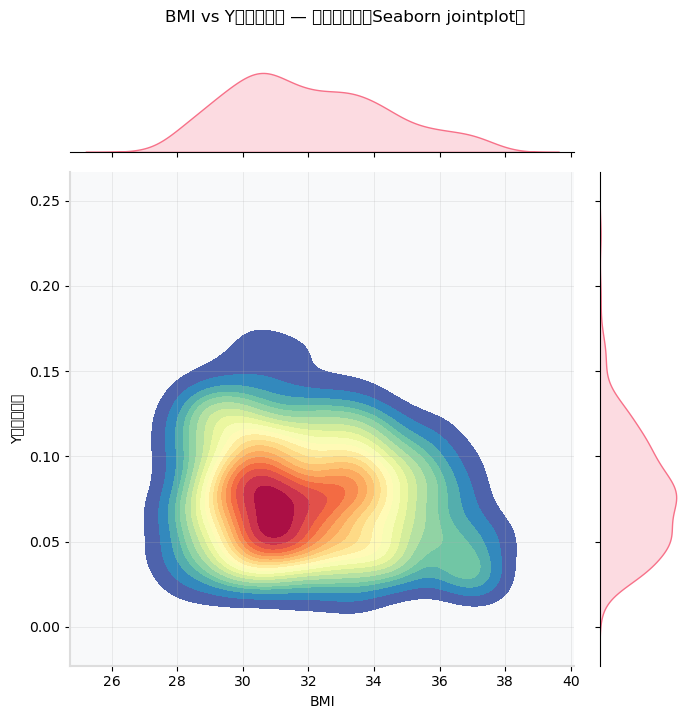

In [15]:
# 1_seaborn_kde.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 如果你的列名不是下面这样，改成实际列名：
x_col = '孕妇BMI'
y_col = 'Y染色体浓度'   # Y染色体浓度列

# 复制并清洗
df = df_mid[[x_col, y_col]].copy()
df = df.dropna()
# 再次保证 BMI 范围（保险起见）
df = df[(df[x_col] >= 27) & (df[x_col] <= 38)]

n = len(df)
print(f"样本数: {n}")
print(df[[x_col, y_col]].describe())

# 可视化：jointplot（带边缘分布） + 在等高密度图上叠加点图
g = sns.jointplot(
    data=df,
    x=x_col, y=y_col,
    kind="kde",
    fill=True,
    thresh=0.05,
    levels=20,
    cmap="Spectral_r",     # 更鲜明的配色方案
    height=7,
    space=0.05
)

# 在主图上叠加散点
"""
sns.scatterplot(
    data=df,
    x=x_col, y=y_col,
    ax=g.ax_joint,
    s=18,                 # 点大小
    color="black",
    alpha=0.4,
    edgecolor="white",    # 白色描边避免点糊
    linewidth=0.4
)
"""



plt.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
plt.gca().set_facecolor('#F8F9FA')

for spine in plt.gca().spines.values():
    spine.set_linewidth(1.5)
    spine.set_color('#DDDDDD')


g.set_axis_labels("BMI", "Y染色体浓度")
plt.suptitle("BMI vs Y染色体浓度 — 二维核密度（Seaborn jointplot）", y=1.02)
plt.tight_layout()
plt.show()

看形状（直观解读）

    等高线形状与方向

    如果等高线接近 圆形/椭圆形，长轴与横轴平行 → 两个变量近似独立，相关性很弱。

    如果等高线呈 斜长条，长轴倾斜 → 两个变量有线性相关（正相关：斜向右上；负相关：斜向右下）。

    如果等高线呈 弯曲/多峰 → 两变量关系可能是非线性的，甚至存在多个模式（如 BMI 不同区间对应不同浓度水平）。

热点（高密度区）位置

    热点落在某个范围，说明这个区域是样本主要分布区。

    如果存在多个热点 → 数据可能分群（提示需要聚类、分组分析）。

In [4]:
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF
from copulas.multivariate import GaussianMultivariate, VineCopula
from copulas.visualization import scatter_2d

# 假设 df 已经读入，包含列 ['孕妇BMI','Y染色体浓度']
bmi = df['孕妇BMI'].values
yconc = df['Y染色体浓度'].values

# 1️⃣ 边缘分布：先做概率积分变换
#   - 用经验CDF 将原始数据映射到 [0,1] 区间
ecdf_bmi = ECDF(bmi)
ecdf_y = ECDF(yconc)
u = ecdf_bmi(bmi)
v = ecdf_y(yconc)


# 2️⃣ 相关性检验
print("Pearson r:", stats.pearsonr(bmi, yconc))
print("Spearman rho:", stats.spearmanr(bmi, yconc))
print("Kendall tau:", stats.kendalltau(bmi, yconc))

# 3️⃣ Copula 拟合 (以高斯 Copula 为例)
model = GaussianMultivariate()
data_uv = pd.DataFrame({"u":u, "v":v})
model.fit(data_uv)


Pearson r: PearsonRResult(statistic=-0.13164224099553623, pvalue=8.494112284165159e-05)
Spearman rho: SignificanceResult(statistic=-0.11749655316218843, pvalue=0.0004573253251912603)
Kendall tau: SignificanceResult(statistic=-0.07886342748035037, pvalue=0.0004447971745076346)


C:\Users\锤子\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_continuous_distns.py:5574: RuntimeWarning:

divide by zero encountered in divide

C:\Users\锤子\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_distn_infrastructure.py:2789: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\锤子\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_continuous_distns.py:5574: RuntimeWarning:

divide by zero encountered in divide

C:\Users\锤子\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_distn_infrastructure.py:2789: RuntimeWarning:

invalid value encountered in double_scalars



Pearson r: PearsonRResult(statistic=-0.5053635819201173, pvalue=9.056339953796313e-34)
Spearman rho: SignificanceResult(statistic=-0.4911050364201456, pvalue=1.0308674414251664e-31)
Kendall tau: SignificanceResult(statistic=-0.34318236472945884, pvalue=1.8552075951611652e-30)
Unexpected exception formatting exception. Falling back to standard exception

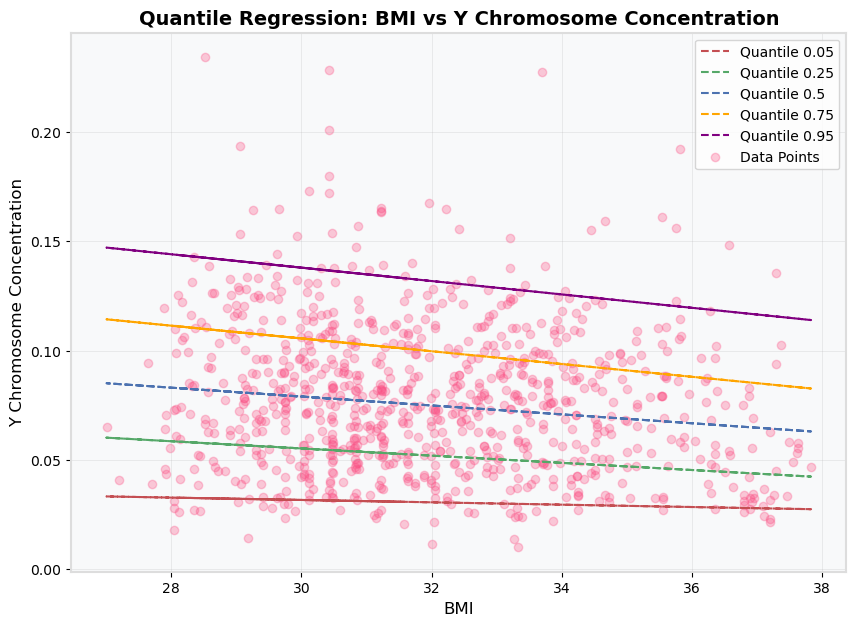

In [33]:
import statsmodels.formula.api as smf
quantiles = [0.05, 0.25, 0.50, 0.75, 0.95]

# 2. 存储模型结果和预测值的字典
models = {}
preds = {}

# 3. 循环拟合分位数回归模型并进行预测
for q in quantiles:
    mod = smf.quantreg('Q("Y染色体浓度") ~ Q("孕妇BMI")', df_mid)
    res = mod.fit(q=q)
    models[q] = res
    preds[q] = res.predict(df_mid['孕妇BMI'])

# 4. 可视化结果
fig, ax = plt.subplots(figsize=(10, 7))

# 为每个分位数曲线选择颜色
colors = ['r', 'g', 'b', 'orange', 'purple']

# 绘制每一条分位数回归曲线
for i, q in enumerate(quantiles):
    # 使用 .to_numpy() 或 .values 将 Series 转换为 numpy 数组
    x_data = df_mid['孕妇BMI'].to_numpy()
    y_data = preds[q].to_numpy() 
    
    ax.plot(x_data, y_data, color=colors[i], linestyle='--', label=f'Quantile {q}')

# 叠加原始数据散点图
ax.scatter(df_mid['孕妇BMI'], df_mid['Y染色体浓度'], alpha=0.3, label='Data Points', color='#fc5185')

ax.set_xlabel('BMI', fontsize=12)
ax.set_ylabel('Y Chromosome Concentration', fontsize=12)
ax.set_title('Quantile Regression: BMI vs Y Chromosome Concentration', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)

# 设置网格和样式
plt.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
plt.gca().set_facecolor('#F8F9FA')

# 美化边框
for spine in plt.gca().spines.values():
    spine.set_linewidth(1.5)
    spine.set_color('#DDDDDD')

plt.show()

C:\Users\锤子\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_continuous_distns.py:5574: RuntimeWarning:

divide by zero encountered in divide

C:\Users\锤子\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_distn_infrastructure.py:2789: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\锤子\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_continuous_distns.py:5574: RuntimeWarning:

divide by zero encountered in divide

C:\Users\锤子\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_distn_infrastructure.py:2789: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\锤子\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_continuous_distns.py:5574: RuntimeWarning:

divide by zero encountered in divide

C:\Users\锤子\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_distn_infrastructure.py:2789: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\锤子\AppData\Roaming\Python\Python38\site-pac

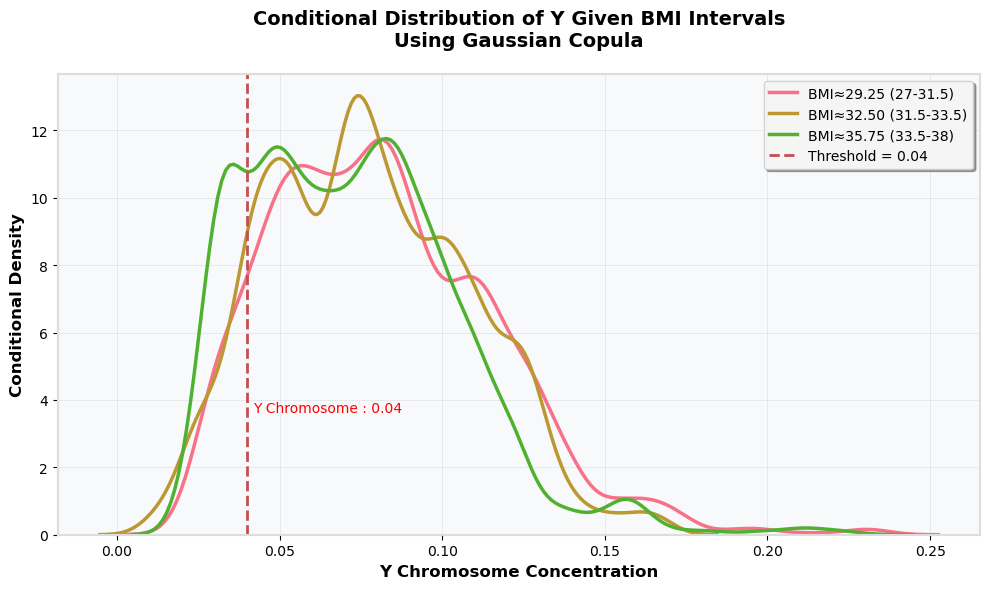

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
from copulas.multivariate import GaussianMultivariate

# 设置样式
plt.style.use('default')
sns.set_palette("husl")

# 假设 df_mid 已经存在，包含 '孕妇BMI','Y染色体浓度'
# ------------------------
# 1. 定义区间 & 中点
# ------------------------
df = pd.read_excel('filtered-ref.xlsx')
df_low = df[df['孕妇BMI'] < 27].copy()
df_mid = df[(df['孕妇BMI'] >= 27) & (df['孕妇BMI'] <= 38)].copy()
df_high = df[df['孕妇BMI'] > 38].copy()

intervals = [(27, 31.5), (31.5, 33.5), (33.5, 38)]
midpoints = [(low + high) / 2 for (low, high) in intervals]

# 设置绘图
fig, ax = plt.subplots(figsize=(10, 6))

for i, (low, high) in enumerate(intervals):
    # ------------------------
    # 2. 取该区间数据
    # ------------------------
    df_sub = df_mid[(df_mid['孕妇BMI'] >= low) & (df_mid['孕妇BMI'] <= high)]
    bmi_sub = df_sub['孕妇BMI'].values
    y_sub = df_sub['Y染色体浓度'].values
    
    # ------------------------
    # 3. 边缘概率积分变换
    # ------------------------
    ecdf_bmi = ECDF(bmi_sub)
    ecdf_y = ECDF(y_sub)
    
    u = ecdf_bmi(bmi_sub)
    v = ecdf_y(y_sub)
    data_uv = pd.DataFrame({'u': u, 'v': v})
    
    # ------------------------
    # 4. 拟合 Gaussian Copula
    # ------------------------
    copula_model = GaussianMultivariate()
    copula_model.fit(data_uv)
    
    # ------------------------
    # 5. 生成条件分布
    # ------------------------
    # 使用区间中点 BMI
    u_b = ecdf_bmi(midpoints[i])
    
    # 从 Copula 采样
    samples = copula_model.sample(5000)
    v_samples = samples['v'].values
    
    # 反向映射到 Y
    y_samples = np.quantile(y_sub, v_samples)
    
    # ------------------------
    # 6. 绘制核密度曲线
    # ------------------------
    sns.kdeplot(y_samples, 
                label=f'BMI≈{midpoints[i]:.2f} ({low}-{high})', 
                linewidth=2.5,
                ax=ax)

# --- 绘制垂直线 ---
threshold = 0.04
ax.axvline(x=threshold, color='r', linestyle='--', linewidth=2, label=f'Threshold = {threshold}')

# --- 在垂直线附近标注文字 ---
ax.text(x=threshold + 0.002, y=ax.get_ylim()[1] * 0.29, s=f'Y Chromosome : {threshold}', 
        fontsize=10, color='red', ha='left', va='top')   
    
# 图像美化
ax.set_xlabel('Y Chromosome Concentration', fontsize=12, fontweight='bold')
ax.set_ylabel('Conditional Density', fontsize=12, fontweight='bold')
ax.set_title('Conditional Distribution of Y Given BMI Intervals\nUsing Gaussian Copula', 
             fontsize=14, fontweight='bold', pad=20)


# 设置网格和样式
plt.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
plt.gca().set_facecolor('#F8F9FA')

# 美化边框
for spine in plt.gca().spines.values():
    spine.set_linewidth(1.5)
    spine.set_color('#DDDDDD')


# 添加网格
#ax.grid(True, alpha=0.3, linestyle='--')

# 美化图例
ax.legend(frameon=True, fancybox=True, shadow=True, framealpha=0.9)

# 调整布局
plt.tight_layout()

# 显示图表
plt.show()

1. Gaussian Copula

特点：

假设变量之间的依赖结构接近 线性相关。

它能捕捉“整体趋势”的相关性（比如 BMI 增大时，Y 浓度整体是上升还是下降）。

但是，它 无法捕捉尾部相关性 ——也就是说，当 BMI 特别高时，Y 浓度的极端表现不会比整体趋势更强烈。

适用场景：
如果你发现 散点图呈椭圆形，没有明显长尾或极端偏离，Gaussian Copula 就足够。
它适合作为 baseline（基准模型），因为估计和解释都比较直观。

我想对df_high用t Copula

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

import matplotlib.pyplot as plt
# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置支持中文的字体，优先使用SimHei
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
sns.set_theme(style="white", font_scale=1.2)

df = pd.read_excel('filtered-ref.xlsx')
df_low = df[df['孕妇BMI'] < 27].copy()
df_mid = df[(df['孕妇BMI'] >= 27) & (df['孕妇BMI'] <= 38)].copy()
df_high = df[df['孕妇BMI'] > 38].copy()